<a href="https://colab.research.google.com/github/SandeepH2706/AI-Training-Stellaraa/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [ ]:
#Loading and Inspecting the Data
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")
fashion_train.shape

(60000, 785)

In [ ]:
# Data Preparation: Separating Features and Labels
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

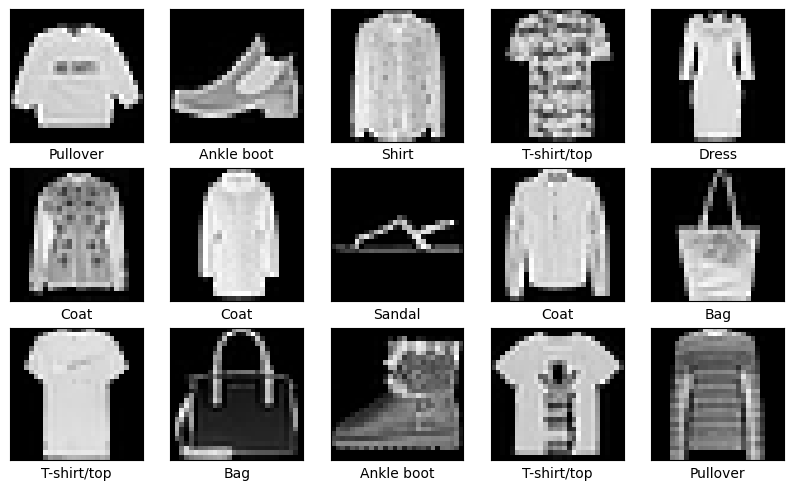

In [ ]:
#Visualizing the Fashion MNIST Dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [ ]:
#One-Hot Encoding the Target Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
#adam is a popular optimization algorithm
#The model will track and report its accuracy during training and evaluation using this metric
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5093 - loss: 1.4555 - val_accuracy: 0.7734 - val_loss: 0.5904
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7325 - loss: 0.7718 - val_accuracy: 0.8303 - val_loss: 0.4765
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7705 - loss: 0.6779 - val_accuracy: 0.8458 - val_loss: 0.4602
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7818 - loss: 0.6451 - val_accuracy: 0.8393 - val_loss: 0.4857
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7926 - loss: 0.6208 - val_accuracy: 0.8485 - val_loss: 0.4927
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8005 - loss: 0.6028 - val_accuracy: 0.8470 - val_loss: 0.4594
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8041 - loss: 0.5876 - val_accuracy: 0.8496 - val_loss: 0.6273
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8119 - loss: 0.5766 - val_accuracy: 0.

In [ ]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3737


In [ ]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8684


In [ ]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


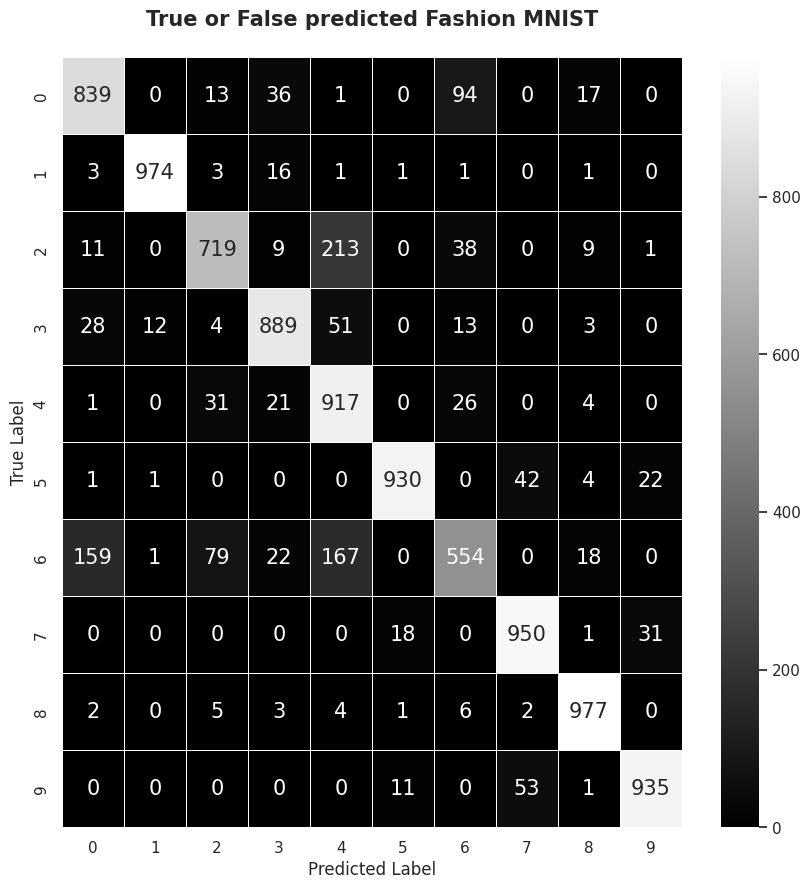

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply Seaborn theme instead of plt.style
sns.set_theme(style="darkgrid")

# Your data
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted Fashion MNIST\n', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.72      0.78      1000
           3       0.89      0.89      0.89      1000
           4       0.68      0.92      0.78      1000
           5       0.97      0.93      0.95      1000
           6       0.76      0.55      0.64      1000
           7       0.91      0.95      0.93      1000
           8       0.94      0.98      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


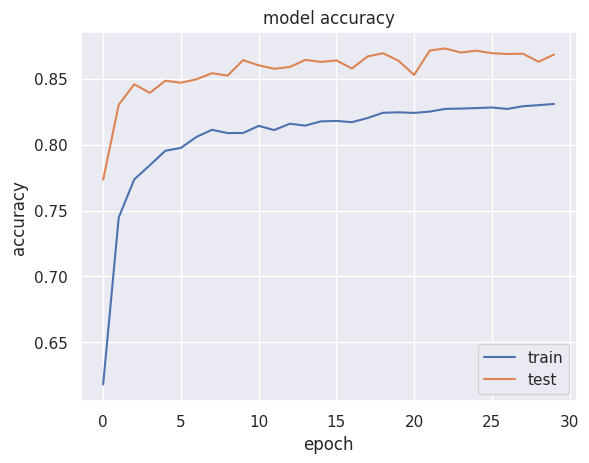

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


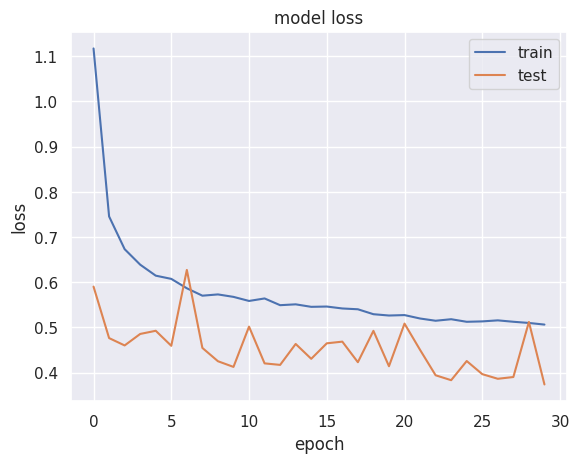

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


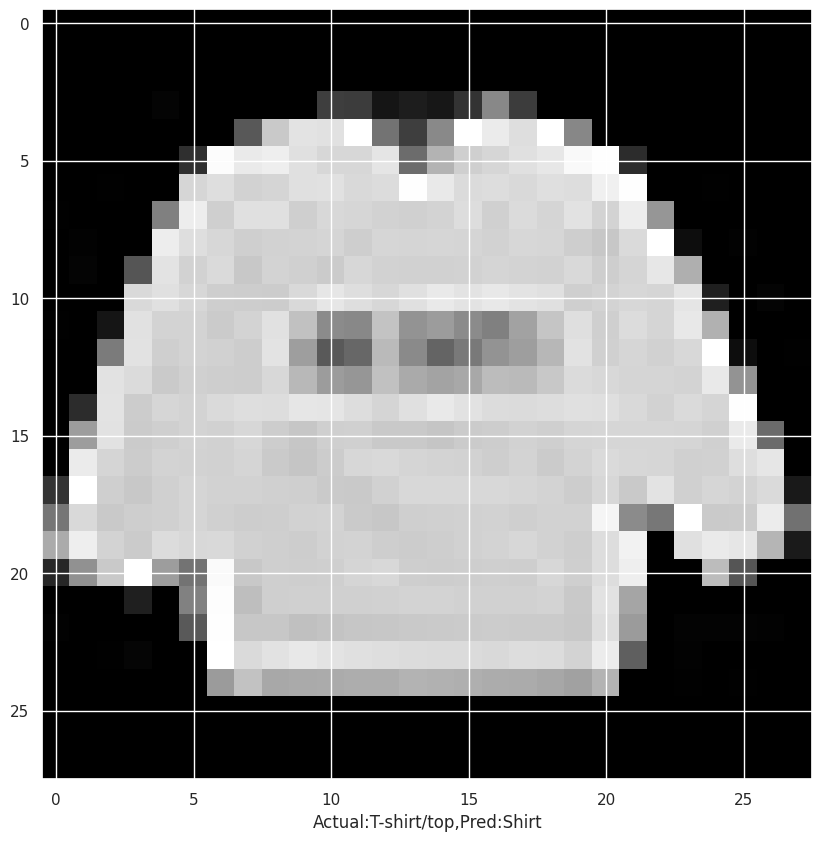

In [ ]:
#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()